## DATA601 - Fall 2022
### HW Assignment 2
Due date: October 24, 2022

In [1]:
import numpy as np
import pandas as pd
import os
import re

from datetime import datetime

<b>Intro:</b> Download this zip file and extract it. 
https://github.com/fgonzaleumbc/Data601_fall2022/blob/main/Datasets/DeviceData.zip?raw=true

There are 150 csv files. In csv file, there are two columns: frequency (f) and efficiency (Q). First column is same in all the csv files. 

The name of the files gives the device parameters. For example, 
"Aphi_AirClad_H410RW855_PulleyCurved_Lc5_G100_W550_Mode1.csv" means that 
- H = 410
- RW = 855
- Lc = 5
- G = 100
- W = 510

<b> Q1. </b> Use pandas to read these csv files with a for loop, create a dataframe called "device_performances", which lists first the device parameters (RW, Lc, G, W) and then all the Q values for each frequency (from 1800 to 5000 at the steps of 5)
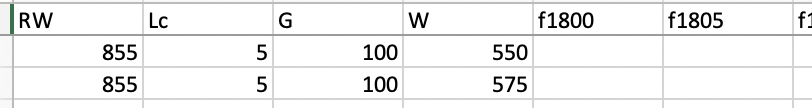

# Extracting data from multiple Files
Extracting data from the names and various files can be done in multiple ways. Some may be easier to understand while others may  be more efficient. Depending on how often you will do the script and routine it may not matter that it is the most efficient as long as it extracts the data correctly. However, if this will be a routine that you will run routinely (e.g., deployed in a server every night) or want to minimize resource utilization you may care about the code efficiency. If this is the case you should do a benchmarking study to compare how long it takes to run different codes. 

Recall that datasets found online tend to be very clean as those that post them online have already done some form of data cleaning/wrangling/preparation before posting. In reality there may be many types of errors in the data. When iterating over hundreds of files errors may be added to the data inconspicuously. Errors can include missing data, in this case could also include collecting the wrong frequency among others. There is one major assumption that is done in some alternatives. It is that all the files have the same shape with the data going from f1800 to f5000 in increments of 5. You may need to be careful with this approach as if there was an error in one of the files and your code does not check for differences you may be matching data in the wrong places without knowing. As I have mentioned in the class publicly available data tends to be really clean. However, in practice many datasets have many types of errors. Alternative 2 gives you an example of a potential if to make sure the data does match before concatenating. 

For example, there may be different errors: (1) Missing frequency or row in which case the alternative 1 code will show an error that the columns do not match. (2) frequency is different but coincidentially the columns match in which case the code in alternative 1 will work and will put the data based on index, the code in Alternative 2 will do not add that datafile to the main dataframe and print a message with files with the differences and we can explore what is the issue afterward.

Before starting any coding, my recommendation is to think about the steps that you need to perform to transform the data, identify and evaluate potential patterns that could be taken advantage of and if multiple approaches evaluate efficiency of the code if it is important or if the code will be run routinely.

# Alternative 1

This alternative reads files in the input_data folder and mostly relies on regular expressions or regex, manipulating lists and dataframes to transform and consolidate the data from the CSV files into one dataframe.

The following section have two other different approaches to transform the CSV data and consolidate in one dataframe as required by the first part of the homework. We will also do a benchmark to compare how quick python is in processing the code in the different approaches.

In [2]:
# Your answer is here

In [3]:
start_time1 = datetime.now() # To measure how long each code block takes.

# Getting all the file names in DeviceData and saving it in a list
csv_files = os.listdir('./input_data/')
csv_files = [i for i in csv_files if 'PulleyCurved' in i]
print(len(csv_files)) # Printing lenght of list to check how many element it has.
print(csv_files[0:3]) # Printing a sample to verify.

150
['Aphi_AirClad_H410RW855_PulleyCurved_Lc10_G100_W550_Mode1.csv', 'Aphi_AirClad_H410RW855_PulleyCurved_Lc10_G100_W575_Mode1.csv', 'Aphi_AirClad_H410RW855_PulleyCurved_Lc10_G100_W600_Mode1.csv']


In [4]:
# Creating empty main DataFrame
device_performances = pd.DataFrame(columns = ['H', 'RW', 'Lc', 'G', 'W', *['f' + str(j) for j in range(1800, 5001, 5)]])
# Extracts the values of the columns from the empty dataframe.
columns = device_performances.columns.values

for i in csv_files:
    data = pd.read_csv('./input_data/' + i, header = None)
    
    # Uses Regular Expressions to obtain parameters from the filenames.
    reg_comp = re.compile(r'[^_]*_[^_]*_H(\d*)RW(\d*)_[^_]*_Lc(\d*)_G(\d*)_W(\d*)')
    reg = re.match(reg_comp, i)
    
    # Combines the parameters from the filenames and values from the csv file.
    values = [int(reg.group(i)) for i in range(1, 6)] + list(data[1].values) # Creates a list of all the values.
    # Creates a temporary dataframe (only one line) with the values of the parameters and the columns
    temp_df = pd.DataFrame([values], columns = columns)
    # Adds the temporary dataframe to the end of the main dataframe by concatenating.
    device_performances = pd.concat([device_performances, temp_df], ignore_index = True)

end_time1 = datetime.now()
total_time1 = end_time1 - start_time1 # Calculating the time the code block takes.

In [5]:
# Shows the head of the main dataframe with all the information from csv files combined.
print(device_performances.shape)
device_performances.head()

(150, 646)


,H,RW,Lc,G,W,f1800,f1805,f1810,f1815,f1820,...,f4955,f4960,f4965,f4970,f4975,f4980,f4985,f4990,f4995,f5000
0,410,855,10,100,550,NaN,NaN,NaN,NaN,NaN,...,647790.4342,649375.53,650998.5392,652651.1596,654300.2354,655947.1782,657658.5961,659389.4499,661109.3616,662777.0394
1,410,855,10,100,575,NaN,NaN,NaN,NaN,NaN,...,412484.0997,414423.8227,416381.2066,418354.9567,420339.384,422334.8538,424352.8179,426385.6454,428428.4049,430434.7884
2,410,855,10,100,600,NaN,NaN,NaN,NaN,NaN,...,317731.9385,319649.6232,321580.0641,323523.7796,325483.5015,327459.4248,329446.1528,331447.371,333465.9325,335457.7014
3,410,855,10,100,625,NaN,NaN,NaN,NaN,NaN,...,274559.7752,276465.9257,278383.3832,280313.357,282262.3565,284230.5662,286205.0784,288194.5974,290205.4477,292194.9967
4,410,855,10,100,650,NaN,NaN,NaN,NaN,NaN,...,255050.3894,256980.4427,258921.477,260875.0281,262849.9221,264846.3535,266846.9294,268863.3036,270903.9703,272926.7103


# Alternative 2

This alternative is very different from the approach in  Alternative 1 for the purposes of showing how different alternatives could be and still get to the same outputs. This alternative relies mosstly on manipulating dataframes it does not use list comprehensions as Alternative 1 does for the loops and will not use regular expressions. 

In [6]:
start_time2 = datetime.now() # To measure how long each code block takes.

# Getting all the file names in DeviceData and saving it in a list
all_files = os.listdir('./input_data/')
csv_files = [] # Initializing an empty list.
for element in all_files:
    if ".csv".lower() in element.lower(): # Makes verification of csv case insensitive
        csv_files.append(element)

# List comprehension equivalent of the for loop above. From a code standpoint is cleaner and more "Pythonic".
#csv_files = [element for element.lower() in csv_files if ".csv".lower() in element] 
# Will only select csv files in directory.

print(len(csv_files)) # Printing lenght of list to check how many element it has.
print(csv_files[0:3]) # Printing a sample to verify.

150
['Aphi_AirClad_H410RW855_PulleyCurved_Lc10_G100_W550_Mode1.csv', 'Aphi_AirClad_H410RW855_PulleyCurved_Lc10_G100_W575_Mode1.csv', 'Aphi_AirClad_H410RW855_PulleyCurved_Lc10_G100_W600_Mode1.csv']


In [7]:
csv_files_diff_cols = [] # Used for tracking files that don't match the headers or columns.

for i in range(len(csv_files)):
    # Loading csv file as temporary df.
    tempdf = pd.read_csv('./input_data/' + csv_files[i], header = None)
    # Changes the column with frequency to string and takes the first for and adds an "f" at the start of string.
    tempdf['col'] = 'f'+tempdf[0].astype(str).str[:4]
    # I don't care about column '0' so let's drop it and reorder the cols.
    tempdf = tempdf[['col', 1]]
    # Filename information in a list using underscore as delimiter.
    file_name = csv_files[i].split("_")
    # Let's create a temporary dataframe with filename information with same columns.
    tempdf_filename_info = pd.DataFrame({'col': ['H', 
                                                 'RW',
                                                 'Lc',
                                                 'G',
                                                 'W'],
                                         1: [int(file_name[2].split('H')[1].split('RW')[0]), # H value from filename
                                             int(file_name[2].split('H')[1].split('RW')[1]), # Rc value from filename
                                             int(file_name[4][2:]), # Lc value from filename 
                                             int(file_name[5][1:]), # G value from filename 
                                             int(file_name[6][1:]) # W value from filename 
                                            ]})
    tempdf = pd.concat([tempdf_filename_info, tempdf], ignore_index = True) # Combines the filenames info with data info.
    tempdf = tempdf.T.reset_index(drop = True) # Transposes the dataframe
    tempdf.rename(columns=tempdf.iloc[0], inplace = True) # Using DataFrame.rename() to convert row to column header.
    tempdf = tempdf.iloc[1:].reset_index(drop = True) # Takes the row with the information.

    if i == 0: # Initializes main dataframe in the first iteration step.
        device_performances2 = tempdf.copy() # Defines the initial main dataframe from the first temp_df.
    else:
        # Let's check that the columns of the main df and the tempdf match before concatenating.
        # If they don't match there may be a file with missing data and we need to track it down.
        if len(np.intersect1d(device_performances2.columns, tempdf.columns)) == device_performances2.shape[1]:
            # Adds the temporary dataframe to the end of the main dataframe.
            device_performances2 = pd.concat([device_performances2, tempdf], ignore_index = True)
        else:
            # Files were headers or columns don't match are added to this list.
            csv_files_diff_cols.append(csv_files[i]) 

if len(csv_files_diff_cols) != 0:
    print(f'Data from {csv_files_diff_cols} does not seem to match with other data files.')
    print(f'The data from these files was not added to the data.')
            
device_performances2.iloc[:,:5] = device_performances2.iloc[:,:5].astype('int') # Converts columns 0 to 4 to integer.
            
end_time2 = datetime.now()
total_time2 = end_time2 - start_time2 # Calculating the time the code block takes.

In [8]:
# Shows the head of the main dataframe with all the information from csv files combined.
print(device_performances2.shape)
device_performances2.head(5)

(150, 646)


,H,RW,Lc,G,W,f1800,f1805,f1810,f1815,f1820,...,f4955,f4960,f4965,f4970,f4975,f4980,f4985,f4990,f4995,f5000
0,410,855,10,100,550,NaN,NaN,NaN,NaN,NaN,...,647790.4342,649375.53,650998.5392,652651.1596,654300.2354,655947.1782,657658.5961,659389.4499,661109.3616,662777.0394
1,410,855,10,100,575,NaN,NaN,NaN,NaN,NaN,...,412484.0997,414423.8227,416381.2066,418354.9567,420339.384,422334.8538,424352.8179,426385.6454,428428.4049,430434.7884
2,410,855,10,100,600,NaN,NaN,NaN,NaN,NaN,...,317731.9385,319649.6232,321580.0641,323523.7796,325483.5015,327459.4248,329446.1528,331447.371,333465.9325,335457.7014
3,410,855,10,100,625,NaN,NaN,NaN,NaN,NaN,...,274559.7752,276465.9257,278383.3832,280313.357,282262.3565,284230.5662,286205.0784,288194.5974,290205.4477,292194.9967
4,410,855,10,100,650,NaN,NaN,NaN,NaN,NaN,...,255050.3894,256980.4427,258921.477,260875.0281,262849.9221,264846.3535,266846.9294,268863.3036,270903.9703,272926.7103


# Alternative 3

This alternative uses some of the portions from alternative 1 and 2 but relies mostly on arrays for its approach for manipulating the data for each row. The same approach could also use lists insteads of arrays.  Note that the differences between list and array.
- A list can have multiple types of data, in this case there are integers and floats.
- An array can only have one type of data but is faster than a list.

In [9]:
start_time3 = datetime.now() # To measure how long each code block takes.

# The previous file reading approaches ONLY read the files in the specified directory and not sub-directories.
# The approach here reads all files including sub-directories and keeps track of folders they are located.
# Reading the files using this code block is unnecesary because we know there are no subdirectoris.

# See Documentation for os.walk(): https://docs.python.org/3/library/os.html
all_files_tuple = [x for x in os.walk(top = './input_data/')] # Produces a 3-tuple of (dirpath, dirnames, filenames)
#all_files_tuple[0][0] # all_files_tuple has two positional arguments in this case.
#all_files_tuple[i][j], i is the elements of the main directory with dirpath, dirnames (folders) and filenames.
#all_files_tuple[i][j], j=0 is full_dir_path, j=1 is dirnames (folders), j=2 is any files

# Goal: I want to obtain a list of the specified type file (e.g., csv) with their relative directory to later iterate thru.
all_files_dir = [] # Defines a starting empty list for the all_files_dir.
sub_folders = [] # Defines a starting empty List of subfolder names that will have specified file type (e.g., csv).

for i in range(len(all_files_tuple)): # Iterates thru each index or element in all_files_tuple.
    # Iterates thru files in dir and only select files in directory with specified extension (case insensitive).
    csv_files = [filename for filename in os.listdir(all_files_tuple[i][0]) if filename.lower().endswith('.csv'.lower())]
    # Combines both the relative path and filename
    csv_files = [all_files_tuple[i][0] +'/'+ filename  for filename in csv_files]
    # Consolidates all files from the path being iterated into the main list.
    all_files_dir = all_files_dir + csv_files
    
# Iterates thru all file directories to extract Folder name. Located at all_files_dir[i].split('/')[2]
for i in range(len(all_files_dir)):
    sub_folders = sub_folders + [all_files_dir[i].split('/')[2]]   
sub_folders = set(sub_folders) # Creates unique list of subfolders by removing duplicates.
# The subfolders could mean a year a location or some other important information.
# Because there are no subfolders in the input_file this will be an empty list.

# Checks if final list has not duplicate files.
print(f'List has no duplicate files: {len(all_files_dir) == len(set(all_files_dir))}.')
print(f'There are {len(all_files_dir)} specified file type (e.g., csv).') # Shows how many files are in the final list.
print(f'Unique subfolders with specified file type (e.g., csv): {sub_folders}.') # Show list of sub-folders.
print(f'Sample of three files: {all_files_dir[:3]}.') # Shows only the first 3 files in the list.

List has no duplicate files: True.
There are 150 specified file type (e.g., csv).
Unique subfolders with specified file type (e.g., csv): {''}.
Sample of three files: ['./input_data//Aphi_AirClad_H410RW855_PulleyCurved_Lc10_G100_W550_Mode1.csv', './input_data//Aphi_AirClad_H410RW855_PulleyCurved_Lc10_G100_W575_Mode1.csv', './input_data//Aphi_AirClad_H410RW855_PulleyCurved_Lc10_G100_W600_Mode1.csv'].


In [10]:
# Creating empty main DataFrame with the columns required.
device_performances3 = pd.DataFrame(columns = ['H', 'RW', 'Lc', 'G', 'W',
                                                   *['f' + str(j) for j in range(1800, 5001, 5)]])
    
for i in range(len(csv_files)):
    # Loading csv file as temporary df.
    tempdf = pd.read_csv(csv_files[i], header = None)
    # Filename information in a list using underscore as delimiter.
    file_name = csv_files[i].split("_")
    # Creates a an arry with all the row data.
    # Values of H, RW, Lc, G, W and Tempdf column 1.
    new_row_data_arr = np.concatenate((np.array([int(file_name[3].split('H')[1].split('RW')[0]), 
                                                int(file_name[3].split('H')[1].split('RW')[1]), 
                                                int(file_name[5][2:]), 
                                                int(file_name[6][1:]),  
                                                int(file_name[7][1:])]),
                                      np.array(tempdf[1])),
                                     axis = 0)
    # Before concatenating the new row we should make sure all the data matches and is correct.
    # Before concatenating let's check the new row has the same number of features as the main dataframe.
    if device_performances3.shape[1] != len(new_row_data_arr):
        print(f'PROCESS STOPPED: Following file does not has the same number of features/columns:')
        print(f'{csv_files[i]}') # Prints the file with the issue.
        break # If there is a row that does not meet this condition for loop breaks.
        # We could also take the approach of Alternative 2 and make a list of files that had an issue.
    
    # Before adding the new row we should check that the frequency values of the row matches those in the main dataframe.
    # This checks that f1800 in the main dataframe is f1800 in the data files.
    # This code does a few things, first, takes the column of tempdf to a numpy array.
    # The array has the Freqencies whcih are converted to the same order of magnitude as main df columns by dividing by 1E11.
    # Then converts to a list, then its elements to string and adds the "f" at the begining of each string. 
    freq_list = [str(element) for element in ((tempdf[0].to_numpy()/(1E11)).astype(int)).tolist()]
    freq_list = ['f'+element for element in freq_list] # Adds the "f" to the frequency numbers.
    # Checks that the list of "fXXXX" for the csv file and main list are the same and concats the new_row.
    if len(np.intersect1d(device_performances3.columns.tolist()[5:], freq_list)) == tempdf.shape[0]:
            # Adds the new_row at the end of the main dataframe. 
            device_performances3.loc[(len(device_performances3))] = new_row_data_arr

# Converts columns 0 to 4 to integer.  
#device_performances3.iloc[:,:5] = device_performances3.iloc[:,:5].astype(int).  
device_performances3[['H', 'RW', 'Lc', 'G', 'W']] = device_performances3[['H', 'RW', 'Lc', 
                                                                          'G', 'W']].astype('int') 

end_time3 = datetime.now()
total_time3 = end_time3 - start_time3 # Calculating the time the code block takes.

In [11]:
# Shows the head of the main dataframe with all the information from csv files combined.
print(device_performances3.shape)
device_performances3.head(5)

(150, 646)


,H,RW,Lc,G,W,f1800,f1805,f1810,f1815,f1820,...,f4955,f4960,f4965,f4970,f4975,f4980,f4985,f4990,f4995,f5000
0,410,855,10,100,550,NaN,NaN,NaN,NaN,NaN,...,647790.4342,649375.5300,650998.5392,652651.1596,654300.2354,655947.1782,657658.5961,659389.4499,661109.3616,662777.0394
1,410,855,10,100,575,NaN,NaN,NaN,NaN,NaN,...,412484.0997,414423.8227,416381.2066,418354.9567,420339.3840,422334.8538,424352.8179,426385.6454,428428.4049,430434.7884
2,410,855,10,100,600,NaN,NaN,NaN,NaN,NaN,...,317731.9385,319649.6232,321580.0641,323523.7796,325483.5015,327459.4248,329446.1528,331447.3710,333465.9325,335457.7014
3,410,855,10,100,625,NaN,NaN,NaN,NaN,NaN,...,274559.7752,276465.9257,278383.3832,280313.3570,282262.3565,284230.5662,286205.0784,288194.5974,290205.4477,292194.9967
4,410,855,10,100,650,NaN,NaN,NaN,NaN,NaN,...,255050.3894,256980.4427,258921.4770,260875.0281,262849.9221,264846.3535,266846.9294,268863.3036,270903.9703,272926.7103


# Alternatives Comparison

In [12]:
# Let's compare that our two dataframes from Alternative 1 and Alternative 2 are the same.
print(device_performances.equals(device_performances2))
# Let's compare that our two dataframes from Alternative 1 and Alternative 3 are the same.
print(device_performances.equals(device_performances3)) # This results in a False let's explore below.

True
False


In [13]:
# Let's try to figure out why it may have been false.
# In alternative 1 see that the columns were converted to an object.
device_performances.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Columns: 646 entries, H to f5000
dtypes: object(646)
memory usage: 757.2+ KB


In [14]:
device_performances3.info() # When using arrays it is faster but in this case the array was using float and integers.

<class 'pandas.core.frame.DataFrame'>
Int64Index: 150 entries, 0 to 149
Columns: 646 entries, H to f5000
dtypes: float64(641), int32(5)
memory usage: 755.3 KB


In [15]:
# Let's see how much time each alternative took to process.
print(f'Alternative 1 takes: {total_time1}.')
print(f'Alternative 2 takes: {total_time2}.')
print(f'Alternative 3 takes: {total_time3}.')

Alternative 1 takes: 0:00:03.461097.
Alternative 2 takes: 0:00:02.503335.
Alternative 3 takes: 0:00:00.914487.


Note that even though the code of Alternative 1 is longer than Alternative 2 and 3, it takes the longest. Recall alternative one relied in regex, alternative 2 mostly relied on making string and dataframe modifications while alternative 3 relied on arrays as much as possible. If I was doing this process for millions of files, the Approach 3 will return significant gains in resource utilization and process efficiency. For the case of this homework, waiting two or three more seconds is insignificant.

# Continuation: Question 2

<b> Q2. </b> a. Determine the shape of your dataframe <br>
b. Check the first and last rows. <br>
c. Determine the basics statistics (mean, min, max, etc.) <br>
c. Remove the columns if they are all empty (or NaN)  <br>
d. Save your dataframe as a csv file.

In [16]:
# Your answer is here 
# a.
print('Shape of the dataframe is ')
print('Rows ------->', device_performances.shape[0])
print('Columns ---->', device_performances.shape[1])

Shape of the dataframe is 
Rows -------> 150
Columns ----> 646


In [17]:
# Your answer is here 
# b.

# Checking first row

device_performances.head(1)

,H,RW,Lc,G,W,f1800,f1805,f1810,f1815,f1820,...,f4955,f4960,f4965,f4970,f4975,f4980,f4985,f4990,f4995,f5000
0,410,855,10,100,550,NaN,NaN,NaN,NaN,NaN,...,647790.4342,649375.53,650998.5392,652651.1596,654300.2354,655947.1782,657658.5961,659389.4499,661109.3616,662777.0394


In [18]:
# Checking last row

device_performances.tail(1)

,H,RW,Lc,G,W,f1800,f1805,f1810,f1815,f1820,...,f4955,f4960,f4965,f4970,f4975,f4980,f4985,f4990,f4995,f5000
149,410,855,9,300,650,NaN,NaN,NaN,NaN,NaN,...,212569343.995,215994584.4125,219499587.8059,223063066.7479,226680035.6348,230350465.2489,234086731.4002,237882771.0928,241734421.5941,245631430.984


In [19]:
# Your answer is here 
# c.

device_performances.describe()

,H,RW,Lc,G,W,f1800,f1805,f1810,f1815,f1820,...,f4955,f4960,f4965,f4970,f4975,f4980,f4985,f4990,f4995,f5000
count,150,150,150,150,150,0,0,0,0,0,...,150.0000,150.00,150.0000,150.0000,150.0000,150.0000,150.0000,150.0000,150.0000,150.0000
unique,1,1,6,5,5,0,0,0,0,0,...,150.0000,150.00,150.0000,150.0000,150.0000,150.0000,150.0000,150.0000,150.0000,150.0000
top,410,855,10,100,550,NaN,NaN,NaN,NaN,NaN,...,647790.4342,649375.53,650998.5392,652651.1596,654300.2354,655947.1782,657658.5961,659389.4499,661109.3616,662777.0394
freq,150,150,25,30,30,NaN,NaN,NaN,NaN,NaN,...,1.0000,1.00,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000


In [20]:
# Your answer is here 
# d.

# Dropping all the columns with are all empty
drop_columns = device_performances.columns[(device_performances.isna().sum(axis = 0) == device_performances.shape[0])].values
device_performances.drop(drop_columns, inplace = True, axis = 1)
print('Shape of the dataframe after dropping the columns is', device_performances.shape)

Shape of the dataframe after dropping the columns is (150, 630)


In [21]:
# Saving the final file as a csv
device_performances.to_csv('modified.csv', index = False)

<b> Q3. </b> Read the csv file you created in the previous question again using pandas.
Either using melt or stuck, create a new dataframe which list device parameters (RW, Lc, G, W), frequency, and quantum efficiency in the following format.

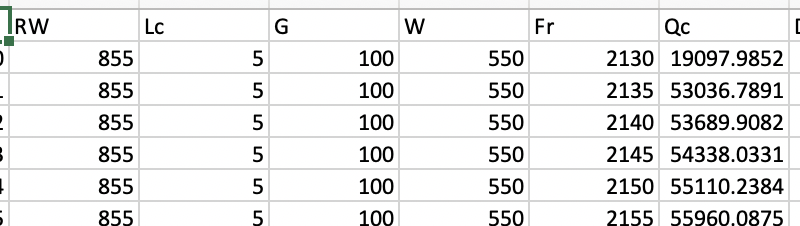

In [22]:
# Your answer is here 

new_data = pd.read_csv('./modified.csv')

# Using melt to modify the imported data
new_df = new_data.melt(id_vars = ['H', 'RW', 'Lc', 'G', 'W'], var_name = 'Fr', value_name = 'Qc')

# Converting 'Fr' column to numeric values
new_df.Fr = pd.Series(new_df.Fr.str[1:], dtype = 'int64')

new_df.head()

,H,RW,Lc,G,W,Fr,Qc
0,410,855,10,100,550,1880,NaN
1,410,855,10,100,575,1880,NaN
2,410,855,10,100,600,1880,NaN
3,410,855,10,100,625,1880,NaN
4,410,855,10,100,650,1880,4983.5471


<b> Q4. </b> Read the following dataset with pandas.
https://raw.githubusercontent.com/fgonzaleumbc/Data601_fall2022/main/Datasets/multiindex_dataset.csv

In [23]:
df = pd.read_csv('https://raw.githubusercontent.com/fgonzaleumbc/Data601_fall2022/main/Datasets/multiindex_dataset.csv', parse_dates=['Date'])

In [24]:
df.head(5)

,Date,Store,Category,Subcategory,UPC EAN,Description,Dollars,Units
0,2018-07-11,Store 3,Beer,Ales,736920111112,Goose Island - Honkers Ale - 6 Pack,35.68,4
1,2018-07-11,Store 2,Beer,Ales,736920111112,Goose Island - Honkers Ale - 6 Pack,166.74,14
2,2018-07-10,Store 3,Beer,Ales,736920111112,Goose Island - Honkers Ale - 6 Pack,67.36,8
3,2018-07-10,Store 2,Beer,Ales,736920111112,Goose Island - Honkers Ale - 6 Pack,80.01,9
4,2018-07-12,Store 3,Beer,Ales,736920111112,Goose Island - Honkers Ale - 6 Pack,78.30,10


Use multiindexing and determine <br>
a. How much total money has been made in each store <br>
b. How many units have been sold <br>
c. Which store sold the highest number of beer units <br>
d. Most profitable product (profit = $$/unit)


In [25]:
# Question (a)

store = df.groupby('Store').sum()[['Dollars']]
store.Dollars = store.Dollars.apply(lambda x: str(round(x, 2)) + ' $')
store

,Dollars
Store,
Store 1,1649.4 $
Store 2,8221.65 $
Store 3,9073.29 $


In [26]:
# Question (b)

units = df.groupby('Store').sum()[['Units']]

print('Total units sold =', units.Units.sum())
units

Total units sold = 1208


,Units
Store,
Store 1,182
Store 2,454
Store 3,572


In [27]:
# Question (c)

x = df.groupby(['Store', 'Category']).sum().sort_values('Units', ascending = False)
x[(x.index.get_level_values(1) == "Beer")][['Units']]

,,Units
Store,Category,
Store 3,Beer,274
Store 2,Beer,228
Store 1,Beer,39


- Store 3 has sold most number of Beer units

In [28]:
# Question (d)

df['Profit'] = df.Dollars/df.Units
product = df.groupby('Description').sum().sort_values('Profit', ascending = False)[['Profit']]
print('Most profitable product is', product.index[0], 'with profit value of', round(product.iloc[0,0], 2), '$ per unit')
product

Most profitable product is Glenlivet - 12 Year Scotch Whisky - 750 mL Bottle with profit value of 440.66 $ per unit


,Profit
Description,
Glenlivet - 12 Year Scotch Whisky - 750 mL Bottle,440.66
Don Julio - Tequila Blanco - 750 mL Bottle,304.42
Grey Goose - Imported Vodka - 750 mL Bottle,248.02
Curious Beasts - Chardonnay - 750 mL Bottle,245.58
Omission Pale Ale - Gluten Free Pale Ale - 6 Pack,126.52
Sierra Nevada Brewing Co. - Stout - 6 Pack,121.36
Dark Horse - S. Blanc Rose - 750 mL Bottle,109.00
Omission - Gluten Free Lager - 6 Pack,91.38
Bowser Beer - Beefy Brown Ale - 6 Pack,90.15


# Notebook End